In [4]:

df=pd.read_csv('https://github.com/srivatsan88/YouTubeLI/blob/master/dataset/consumer_compliants.zip?raw=true', compression='zip', sep=',', quotechar='"')

In [5]:

df

Date received                      Product  \
0          4/3/2020        Vehicle loan or lease   
1         3/12/2020              Debt collection   
2          2/6/2020        Vehicle loan or lease   
3          3/6/2020  Checking or savings account   
4         2/14/2020              Debt collection   
...             ...                          ...   
57448     2/29/2020                 Student loan   
57449     2/11/2020              Debt collection   
57450     2/29/2020              Debt collection   
57451     1/16/2020  Checking or savings account   
57452     1/16/2020              Debt collection   

                          Sub-product  \
0                                Loan   
1                    Payday loan debt   
2                                Loan   
3                     Savings account   
4                        Medical debt   
...                               ...   
57448  Federal student loan servicing   
57449                      Other debt   
57450                      Other debt   
57451                Checking account   
57452                       Auto debt   

                                                   Issue  \
0                                Getting a loan or lease   
1                      Attempts to collect debt not owed   
2                                Getting a loan or lease   
3                                    Managing an account   
4                      Attempts to collect debt not owed   
...                                                  ...   
57448               Dealing with your lender or servicer   
57449                  Attempts to collect debt not owed   
57450                              Communication tactics   
57451  Problem with a lender or other company chargin...   
57452  Took or threatened to take negative or legal a...   

                                               Sub-issue  \
0                                        Fraudulent loan   
1                                      Debt is not yours   
2                                          Credit denial   
3                                         Banking errors   
4                                      Debt is not yours   
...                                                  ...   
57448        Trouble with how payments are being handled   
57449                                      Debt was paid   
57450   Used obscene, profane, or other abusive language   
57451                     Transaction was not authorized   
57452  Threatened or suggested your credit would be d...   

                            Consumer complaint narrative  \
0      This auto loan was opened on XX/XX/2020 in XXX...   
1      In XXXX of 2019 I noticed a debt for {$620.00}...   
2      As stated from Capital One, XXXX XX/XX/XXXX an...   
3      Please see CFPB case XXXX. \n\nCapital One, in...   
4      This debt was incurred due to medical malpract...   
...                                                  ...   
57448  I am attempting to make a payment toward my st...   
57449  Received letter for {$480.00}. Original credit...   
57450  entire time 10 years until XX/XX/2020. XXXX ma...   
57451  I am a customer with Wells Fargo Bank. Recentl...   
57452  I spoken with them several times in a year. An...   

                                 Company public response  \
0      Company has responded to the consumer and the ...   
1                                                   None   
2                                                   None   
3                                                   None   
4      Company believes it acted appropriately as aut...   
...                                                  ...   
57448                                               None   
57449  Company has responded to the consumer and the ...   
57450  Company has responded to the consumer and the ...   
57451  Company has responded to the consumer and the ...   
57452                                               None   

    

In [ ]:
df['Product'].value_counts()

Product
Debt collection                21772
Credit card or prepaid card    13193
Mortgage                        9799
Checking or savings account     7003
Student loan                    2950
Vehicle loan or lease           2736
Name: count, dtype: int64

In [ ]:
df['Company'].value_counts()

CITIBANK, N.A.                                                    3226
CAPITAL ONE FINANCIAL CORPORATION                                 2711
BANK OF AMERICA, NATIONAL ASSOCIATION                             2580
JPMORGAN CHASE & CO.                                              2409
WELLS FARGO & COMPANY                                             2001
                                                                  ... 
Time Investment Company, Inc.                                        1
Automotive Services Finance, Inc.                                    1
Foxstar Energy Resources LLC DBA Federal Student Loans Council       1
Uplift, Inc                                                          1
Keystone Credit Services LLC                                         1
Name: Company, Length: 2197, dtype: int64

In [6]:
complaints_df=df[['Consumer complaint narrative','Product','Company']].rename(columns={'Consumer complaint narrative':'complaints'})

In [21]:
pd.set_option('display.max_colwidth', -1)
complaints_df

ValueError: ignored

In [22]:
#X_train, X_hold = train_test_split(complaints_df, test_size=0.6, random_state=111)

In [7]:
data = complaints_df.complaints.values.tolist()
data

["This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX  and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.",
 'In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, noth

In [8]:
data = pd.Series(data)

In [9]:
data_processed = data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())

data_processed

0        this auto loan was opened on xx/xx/ in xxxx nc...
1        in xxxx of i noticed a debt for on my credit w...
2        as stated from capital one xxxx xx/xx/xxxx and...
3        please see cfpb case xxxx capital one in the l...
4        this debt was incurred due to medical malpract...
                               ...                        
57448    i am attempting to make a payment toward my st...
57449    received letter for original creditor didnt co...
57450    entire time years until xx/xx/ xxxx makes my b...
57451    i am a customer with wells fargo bank recently...
57452    i spoken with them several times in a year an ...
Length: 57453, dtype: object

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# now lets deal with stopwords
# using nltk stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
len(stop_words)
data_processed =data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))


In [12]:
import re

def preprocess_and_remove_patterns(text):
    # Preprocess the text by removing non-alphabetical characters and converting to lowercase
    preprocessed_text = re.sub(r'[^a-zA-Z\s]+', ' ', text).lower()

    # Define the pattern to remove
    pattern_to_remove = r'\b\d{2}/\d{2}//\b|\b\d{4}/\d{4}//\b|\b\d{2}/\d{2}/\d{4}\b|\bxxxx\b|\bxxxxxx\b|\b(xx/xx//|xx/xx/|xx/xx//xx/xx/)\b|\bxx'

    # Remove numerical numbers and spaces for words that are removed by the pattern
    preprocessed_text = re.sub(pattern_to_remove, '', preprocessed_text)

    # Remove additional spaces
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text).strip()

    return preprocessed_text

# Apply the function to each string in the list
data_final = [preprocess_and_remove_patterns(text) for text in data_processed]



In [13]:
data_final[3]

'please see cfpb case capital one letter provided attached case response said funds reversed sent back received funds staff also staff account holder business looked return money find nothing capital one needs document actually prove returned funds stated letter capital one must provide electronic information return made way document paper check sent back left messages problem person signed letter capital one received call backs summary capital one said returned money continue claim need prove'

# EDA


In [ ]:
words_list = []

# Tokenize and collect words from each sentence in data_final
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))

# Create a frequency distribution
freq_dist = nltk.FreqDist(words_list)

# Get the top 20 most common words and their frequencies
top_words = freq_dist.most_common(20)

# Print the result
print(top_words)

[('account', 89542), ('credit', 73843), ('payment', 47146), ('would', 46177), ('debt', 41061), ('bank', 40775), ('card', 40260), ('loan', 38822), ('told', 36274), ('received', 36086), ('company', 33621), ('called', 32134), ('information', 29508), ('time', 29350), ('never', 26851), ('call', 25968), ('back', 25444), ('payments', 25329), ('mortgage', 25132), ('one', 25051)]


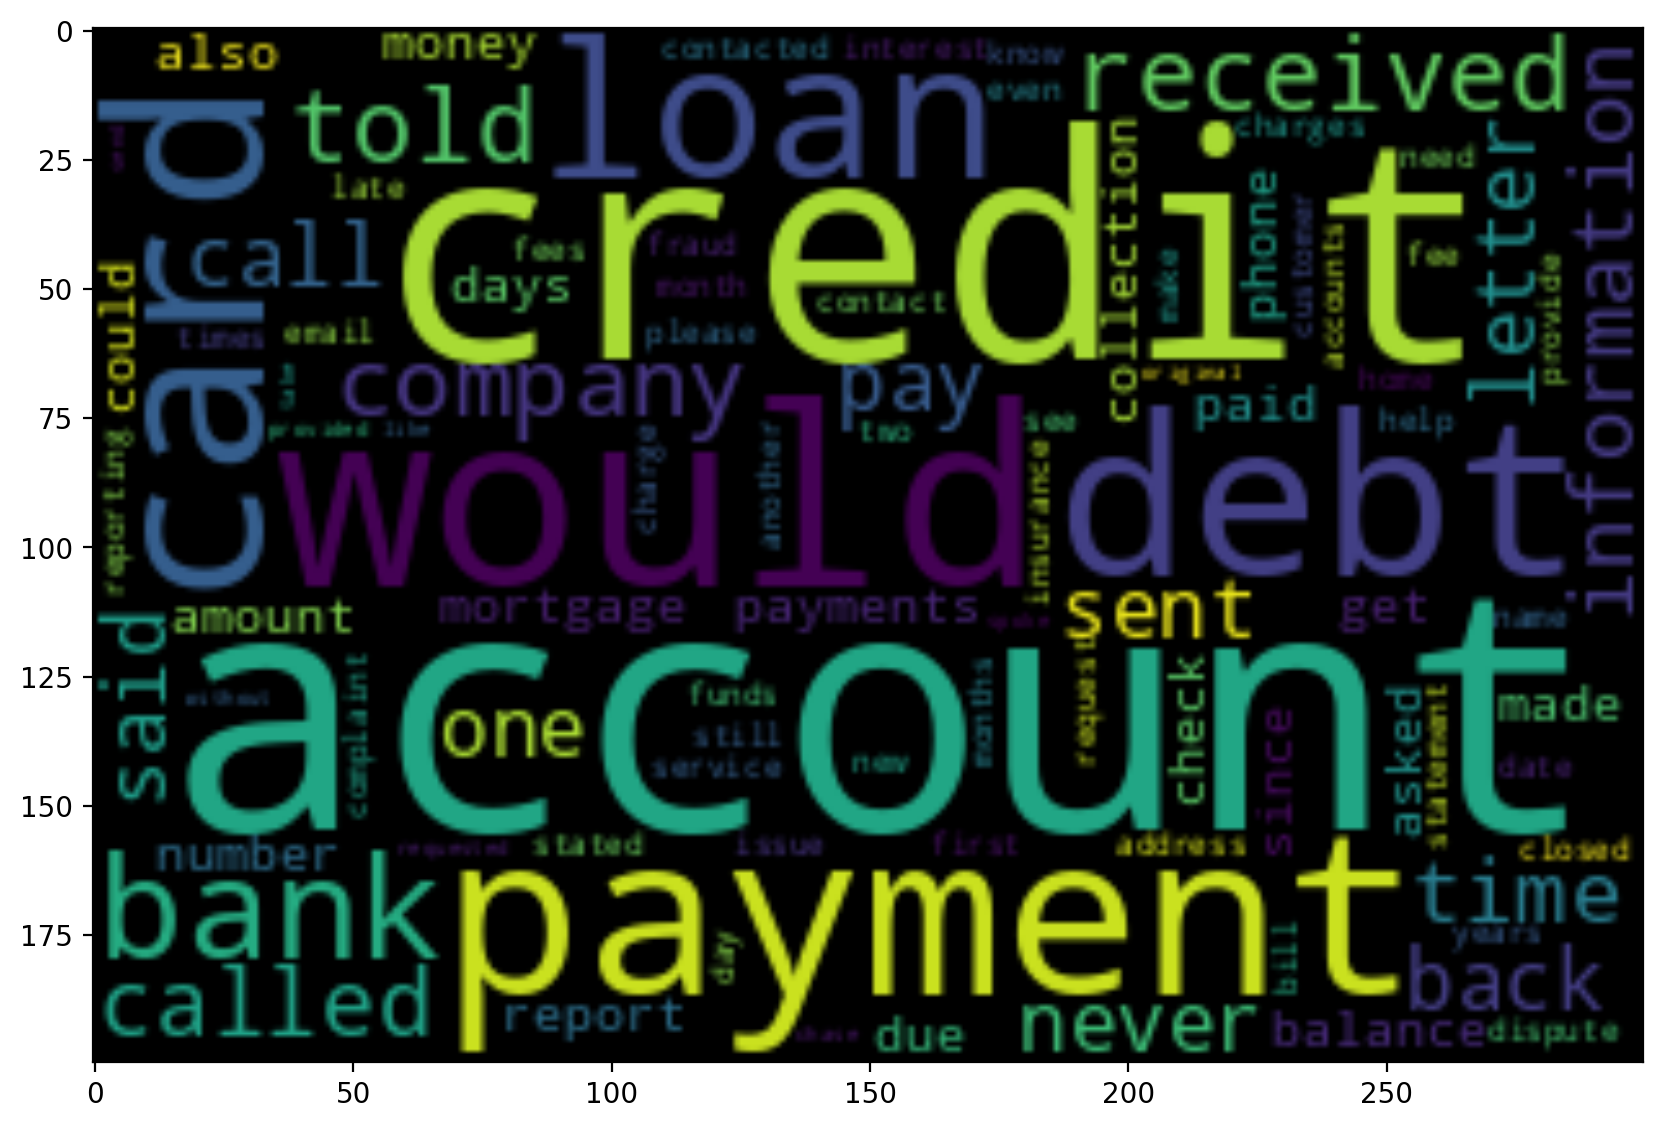

In [ ]:
%config InlineBackend.figure_format = 'retina'


# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

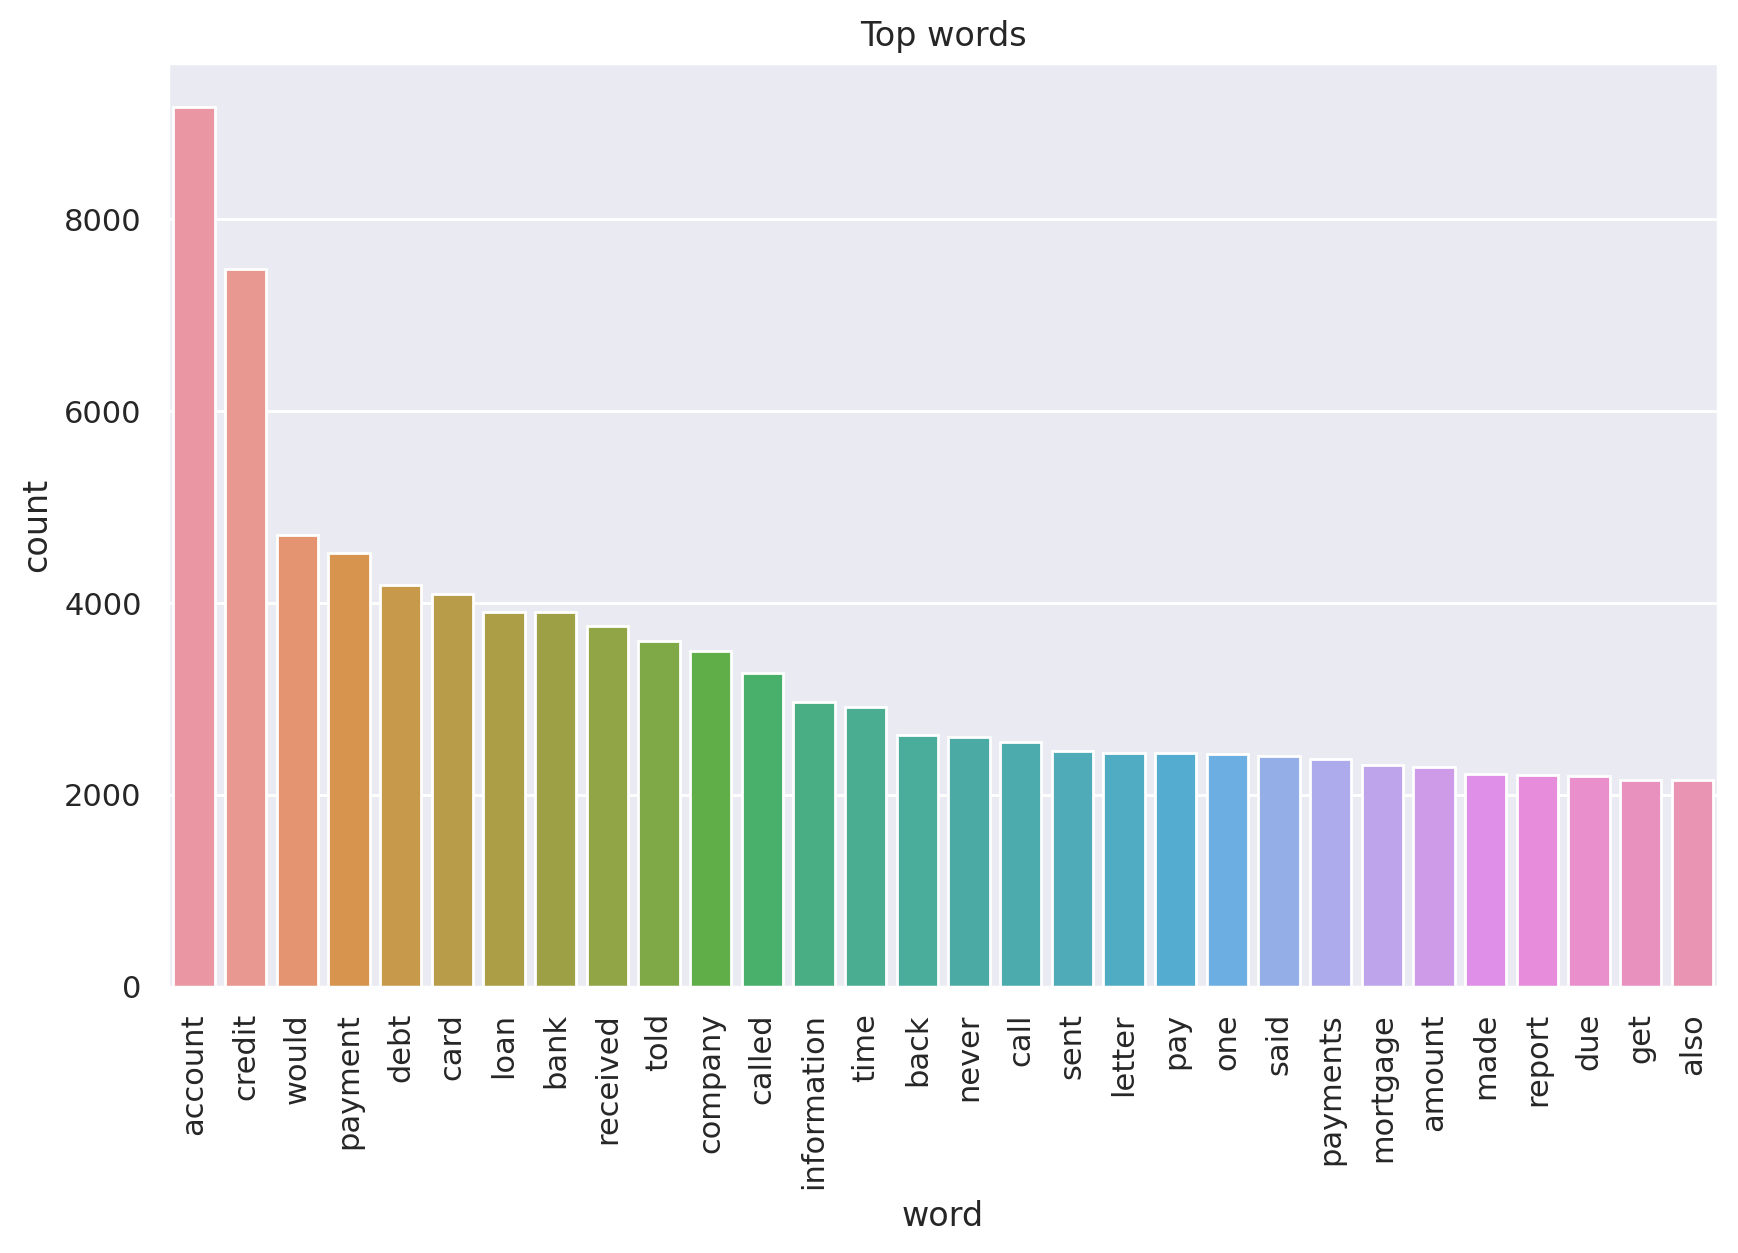

In [ ]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [14]:
words_sent = [x.split() for x in data_final]
words_sent
bigram = Phrases(words_sent, min_count=5, threshold=20)
trigram = Phrases(bigram[words_sent], threshold=20)

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# bow = [bigram_phraser[word] for word in words_sent] # creating bigram
bow = [trigram_phraser[bigram_phraser[word]] for word in words_sent] # creating trigram and bigrambb

In [15]:
bow[1]

['noticed',
 'debt',
 'credit',
 'believed',
 'mine',
 'thought',
 'speedy_cash',
 'bought',
 'one',
 'old',
 'debts',
 'sold',
 'contacted',
 'several_attempts',
 'giving',
 'full',
 'name',
 'nothing',
 'came',
 'system',
 'gave',
 'social',
 'rep',
 'said',
 'account',
 'popped',
 'tell',
 'account',
 'someone_elses',
 'name',
 'continued',
 'let',
 'make',
 'payment',
 'payment',
 'confirmation',
 'number',
 'realizing',
 'account',
 'called',
 'back',
 'get',
 'money',
 'back',
 'inform',
 'mistake',
 'told',
 'needed',
 'mail',
 'ftc_report',
 'dispute',
 'letter',
 'get',
 'money',
 'back',
 'completed',
 'called',
 'said',
 'transferred',
 'account',
 'back',
 'speedy_cash',
 'fraud',
 'review',
 'would',
 'need',
 'contact',
 'contacting',
 'told',
 'get',
 'money',
 'back',
 'issue',
 'representative',
 'played',
 'blind',
 'obvious',
 'fraud',
 'let',
 'innocent',
 'person',
 'make',
 'payment',
 'someone_elses',
 'debt',
 'want',
 'money',
 'back']

In [16]:
### lemmatisation by using spacy and pos tagging
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

# here 'en' in spacy pipeline means the small version of language

In [ ]:
!python -m spacy download en_core_web_sm

2023-10-11 07:49:11.958893: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
doc = nlp(' '.join(bow[0]))
for token in doc:
    print(token ,'=>', token.pos_)

auto => NOUN
loan => NOUN
opened => VERB
name => NOUN
never => ADV
north_carolina => PROPN
never => ADV
resident => ADJ
filed => VERB
dispute => NOUN
twice => ADJ
credit => NOUN
bureaus => PROPN
times => NOUN
claimed => VERB
accurate => ADJ
loan => NOUN
aware => ADJ
today => NOUN
tried => VERB
contact => NOUN
multiple_times => NOUN
never => ADV
gotten => VERB
live => ADJ
person => NOUN
drive => VERB
never => ADV
owned => VERB
car => NOUN
knowledge => NOUN
account => NOUN
checked => VERB
xxxxxx => PROPN
noticed => VERB
tried => VERB
twice => ADV
dispute => NOUN
additionally => ADV
never => ADV
received => VERB
bills => NOUN
information => NOUN
account => NOUN
last_resort => PROPN
trying => VERB
remove => VERB
fraudulent => ADJ
loan => NOUN
account => NOUN


In [18]:
# now lemmatising the whole corpus so that we can reach to the root words
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [19]:
bag_of_words = lemmatization(bow)

In [20]:
bag_of_words

[['auto',
  'loan',
  'open',
  'name',
  'never',
  'north_carolina',
  'never',
  'resident',
  'file',
  'dispute',
  'twice',
  'credit',
  'bureaus',
  'time',
  'claim',
  'accurate',
  'loan',
  'aware',
  'today',
  'try',
  'contact',
  'multiple_time',
  'never',
  'get',
  'live',
  'person',
  'drive',
  'never',
  'own',
  'car',
  'knowledge',
  'account',
  'check',
  'xxxxxx',
  'notice',
  'try',
  'twice',
  'dispute',
  'additionally',
  'never',
  'receive',
  'bill',
  'information',
  'account',
  'last_resort',
  'try',
  'remove',
  'fraudulent',
  'loan',
  'account'],
 ['notice',
  'debt',
  'credit',
  'believe',
  'think',
  'speedy_cash',
  'buy',
  'old',
  'debt',
  'sell',
  'contact',
  'several_attempt',
  'give',
  'full',
  'name',
  'come',
  'system',
  'give',
  'social',
  'rep',
  'say',
  'account',
  'pop',
  'tell',
  'account',
  'someone_else',
  'name',
  'continue',
  'let',
  'make',
  'payment',
  'payment',
  'confirmation',
  'number'

In [21]:
bag_of_words[0:1]

[['auto',
  'loan',
  'open',
  'name',
  'never',
  'north_carolina',
  'never',
  'resident',
  'file',
  'dispute',
  'twice',
  'credit',
  'bureaus',
  'time',
  'claim',
  'accurate',
  'loan',
  'aware',
  'today',
  'try',
  'contact',
  'multiple_time',
  'never',
  'get',
  'live',
  'person',
  'drive',
  'never',
  'own',
  'car',
  'knowledge',
  'account',
  'check',
  'xxxxxx',
  'notice',
  'try',
  'twice',
  'dispute',
  'additionally',
  'never',
  'receive',
  'bill',
  'information',
  'account',
  'last_resort',
  'try',
  'remove',
  'fraudulent',
  'loan',
  'account']]

## now we need to encode the whole corpus into some numbers
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [22]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)
# here keys are some numbers and values are our words

Dictionary<45815 unique tokens: ['account', 'accurate', 'additionally', 'auto', 'aware']...>


In [23]:
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]

In [23]:
corpus_matrix[0]

[(0, 3),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 3),
 (22, 1),
 (23, 1),
 (24, 5),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 3),
 (36, 2),
 (37, 1)]

In [46]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,id2word=id2word,
                                    num_topics=8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
lda_model.print_topics()
# doc_lda = lda_model[corpus_matrix]

[(0,
  '0.067*"loan" + 0.058*"mortgage" + 0.023*"home" + 0.015*"property" + 0.013*"refinance" + 0.012*"lender" + 0.010*"company" + 0.010*"foreclosure" + 0.009*"house" + 0.008*"modification"'),
 (1,
  '0.053*"dispute" + 0.043*"refund" + 0.042*"citi" + 0.036*"citibank" + 0.022*"receive" + 0.022*"merchant" + 0.016*"item" + 0.016*"transaction" + 0.016*"return" + 0.013*"order"'),
 (2,
  '0.017*"consumer" + 0.016*"debt" + 0.015*"provide" + 0.014*"complaint" + 0.012*"file" + 0.012*"law" + 0.010*"court" + 0.010*"information" + 0.010*"notice" + 0.010*"claim"'),
 (3,
  '0.067*"ally" + 0.054*"sps" + 0.045*"sls" + 0.027*"information" + 0.026*"company" + 0.022*"debt" + 0.015*"consumer_reporting_agency" + 0.014*"person" + 0.013*"portfolio" + 0.011*"report"'),
 (4,
  '0.107*"call" + 0.041*"number" + 0.035*"phone" + 0.027*"contact" + 0.021*"ask" + 0.021*"tell" + 0.021*"receive" + 0.020*"company" + 0.015*"representative" + 0.015*"speak"'),
 (5,
  '0.033*"pay" + 0.032*"escrow" + 0.030*"payment" + 0.028*

In [ ]:
lda_model[corpus_matrix[0]]
# corpus_matrix[0]


([(3, 0.15993586),
  (4, 0.06124215),
  (7, 0.042716097),
  (8, 0.015884258),
  (9, 0.019720564),
  (10, 0.037510477),
  (11, 0.08586643),
  (12, 0.054333646),
  (14, 0.05141015),
  (15, 0.019201962),
  (16, 0.037032064),
  (17, 0.2021335),
  (19, 0.03278466),
  (20, 0.08072061),
  (21, 0.071349524)],
 [(0, [21]),
  (1, [11, 19]),
  (2, [3, 11, 8]),
  (3, [12]),
  (4, [3]),
  (5, [9]),
  (6, [11]),
  (7, [20]),
  (8, [10]),
  (9, [20, 8]),
  (10, [3, 17, 8, 19]),
  (11, [11]),
  (12, [20, 8, 11]),
  (13, [17]),
  (14, [3, 11, 19]),
  (15, [20, 11]),
  (16, [17]),
  (17, [19, 11]),
  (18, [3]),
  (19, []),
  (20, [17, 16, 3]),
  (21, [14]),
  (22, [3]),
  (23, [16]),
  (24, [17, 4, 11, 3, 20, 8, 12]),
  (25, [7]),
  (26, [4]),
  (27, [21]),
  (28, [15]),
  (29, [16]),
  (30, [4]),
  (31, [11]),
  (32, [10]),
  (33, [17, 3, 12]),
  (34, [17]),
  (35, [17]),
  (36, [3]),
  (37, [7])],
 [(0, [(21, 2.999991)]),
  (1, [(11, 0.7704295), (19, 0.22921383)]),
  (2, [(3, 0.9619287), (8, 0.0134549

In [34]:

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.999640209443862

Coherence Score:  0.381772937102782


In [ ]:
import pandas as pd

topic_probabilities_df = pd.DataFrame(columns=[f"Topic{i}" for i in range(23)] + ["Dominant_Topic", "Top_2_Text"])

# Define a function to get the top words for a topic
def get_top_words_for_topic(topic):
    return [word for word, weight in lda_model.show_topic(topic)]

# Iterate through each document and calculate dominant topic
for i, document_bow in enumerate(corpus_matrix):
    document_topic_probabilities = lda_model.get_document_topics(document_bow, minimum_probability=0.0)

    # Sort topic probabilities in descending order
    sorted_document_topic_probabilities = sorted(document_topic_probabilities, key=lambda x: x[1], reverse=True)

    # Get the dominant topic and its probability
    dominant_topic = sorted_document_topic_probabilities[0]

    # Get the top words associated with the dominant topic
    top_words_for_dominant_topic = get_top_words_for_topic(dominant_topic[0])

    # Create a row for the DataFrame
    topic_probabilities_row = [0.0] * 23  # Initialize all topic probabilities to 0.0
    topic_probabilities_row[dominant_topic[0]] = dominant_topic[1]  # Set the dominant topic probability

    # Set Dominant_Topic as the base topic number
    topic_probabilities_row += [dominant_topic[0], top_words_for_dominant_topic]


    # Append the row to the DataFrame
    topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_index=True)

# Rename the index to "DocX" where X is the document number
topic_probabilities_df.index = [f"Doc{i}" for i in range(len(corpus_matrix))]

selected_columns = ['Dominant_Topic', 'Top_2_Text']
new_df = topic_probabilities_df[selected_columns]

# For 'Top_2_Text', create bigrams of the top 2 words
new_df['Top_2_Text'] = new_df['Top_2_Text'].apply(lambda x: '_'.join(x[:2]))

# Display the resulting DataFrame
print(new_df)


Streaming output truncated to the last 5000 lines.
<ipython-input-30-62404a9a9487>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_index=True)
<ipython-input-30-62404a9a9487>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_index=True)
<ipython-input-30-62404a9a9487>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_inde

         Dominant_Topic     Top_2_Text
Doc0      17             call_tell    
Doc1      17             call_tell    
Doc2      3              contact_issue
Doc3      17             call_tell    
Doc4      8              debt_company 
...      ..                       ... 
Doc57448  12             payment_pay  
Doc57449  8              debt_company 
Doc57450  17             call_tell    
Doc57451  17             call_tell    
Doc57452  17             call_tell    

[57453 rows x 2 columns]


<ipython-input-30-62404a9a9487>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_index=True)
<ipython-input-30-62404a9a9487>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_index=True)
<ipython-input-30-62404a9a9487>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_probabilities_df = topic_probabilities_df.append(pd.Series(topic_probabilities_row, index=topic_probabilities_df.columns), ignore_index=True)
<ipython-input-30-62404a9a9487>:31: FutureW

In [ ]:
# Create a dictionary to map "Top_2_Text" values to their corresponding "Dominant_Topic" codes
topic_mapping = {
    0: "Checking Account Issues",
    1: "Car Financing and Disclosure",
    2: "Fees and Contracts",
    3: "Legal and Court Cases",
    4: "Consumer Applications and Information",
    5: "Offers and Promotions",
    6: "Loan Agreements and Defaults",
    7: "Escrow and Mortgage Servicing",
    8: "Home Purchase and Costs",
    9: "Credit Card Usage",
    10: "Correspondence via Mail",
    11: "Credit Report and Reporting",
    12: "Payments and Billing",
    13: "Transaction and Fraud Claims",
    14: "Debt Collection and Dispute",
    15: "Phone Calls and Communication",
    16: "Bank Accounts and Transactions",
    17: "General Time and Service Issues",
    18: "Bill Payments and Balances",
    19: "Claims and Fraudulent Transactions",
    20: "Debt Collection and Dispute Resolution",
    21: "General Inquiries and Correspondence"
}


# Assuming you have a DataFrame df with "Dominant_Topic" and "Top_2_Text" columns
#new_df['Dominant_Topic_Code'] = new_df['Top_2_Text'].map(topic_mapping)
new_df['Top_2_Text1'] = new_df['Dominant_Topic'].map(topic_mapping)

<ipython-input-32-c61a580d9826>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Top_2_Text1'] = new_df['Dominant_Topic'].map(topic_mapping)


In [ ]:
new_df['Top_2_Text1']

Doc0        General Time and Service Issues
Doc1        General Time and Service Issues
Doc2        Legal and Court Cases          
Doc3        General Time and Service Issues
Doc4        Home Purchase and Costs        
                     ...                   
Doc57448    Payments and Billing           
Doc57449    Home Purchase and Costs        
Doc57450    General Time and Service Issues
Doc57451    General Time and Service Issues
Doc57452    General Time and Service Issues
Name: Top_2_Text1, Length: 57453, dtype: object

In [ ]:
new_df

Dominant_Topic    Top_2_Text                      Top_2_Text1
Doc0      17             call_tell     General Time and Service Issues
Doc1      17             call_tell     General Time and Service Issues
Doc2      3              contact_also  Legal and Court Cases          
Doc3      17             call_tell     General Time and Service Issues
Doc4      8              debt_company  Home Purchase and Costs        
...      ..                       ...                      ...        
Doc57448  12             payment_pay   Payments and Billing           
Doc57449  8              debt_company  Home Purchase and Costs        
Doc57450  17             call_tell     General Time and Service Issues
Doc57451  17             call_tell     General Time and Service Issues
Doc57452  17             call_tell     General Time and Service Issues

[57453 rows x 3 columns]

In [ ]:
new_df['Top_2_Text'].unique()

array(['call_tell', 'contact_also', 'debt_company', 'servicer_court',
       'payment_pay', 'charge_dispute', 'account_close', 'balance_fee',
       'credit_report', 'card_credit', 'information_request', 'loan_home',
       'number_name', 'mortgage_insurance', 'consumer_sign', 'bank_check',
       'receive_send', 'citi_citibank', 'bill_service',
       'appear_modification', 'refund_cancel'], dtype=object)

In [ ]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(new_df['Top_2_Text1'],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0                                   count
Top_2_Text1                                  
Bank Accounts and Transactions          23   
Car Financing and Disclosure            39   
Claims and Fraudulent Transactions      765  
Consumer Applications and Information   1370 
Correspondence via Mail                 403  
Credit Card Usage                       22   
Credit Report and Reporting             2659 
Debt Collection and Dispute             553  
Debt Collection and Dispute Resolution  640  
Escrow and Mortgage Servicing           362  
Fees and Contracts                      5    
General Inquiries and Correspondence    1356 
General Time and Service Issues         28370
Home Purchase and Costs                 2171 
Legal and Court Cases                   8106 
Loan Agreements and Defaults            150  
Offers and Promotions                   59   
Payments and Billing                    10353
Phone Calls and Communication           2    
Transaction and Fraud Claims            37

In [ ]:
# Assuming you have a DataFrame df with a "Top_2_Text" column
# First, find the value counts of each unique value in the column
value_counts = new_df['Top_2_Text1'].value_counts()

# Identify values with a count less than 500
values_to_convert = value_counts[value_counts < 500].index

# Replace those values with "misc"
new_df.loc[new_df['Top_2_Text1'].isin(values_to_convert), 'Top_2_Text1'] = 'misc'


In [ ]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(new_df['Top_2_Text1'],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0                                   count
Top_2_Text1                                  
Claims and Fraudulent Transactions      765  
Consumer Applications and Information   1370 
Credit Report and Reporting             2659 
Debt Collection and Dispute             553  
Debt Collection and Dispute Resolution  640  
General Inquiries and Correspondence    1356 
General Time and Service Issues         28370
Home Purchase and Costs                 2171 
Legal and Court Cases                   8106 
Payments and Billing                    10353
misc                                    1102

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called topic_probabilities_df

# Define the mapping of old values to new values
#replacement_dict = {'application_citi': 'misc', 'bill_insurance': 'misc','card_credit_card':'misc','charge_purchase':'misc','chase_citibank':'misc', 'daily_late': 'misc','expect_debt_belong':'misc','harass_days_late':'misc','late_fee_term':'misc','law_honor':'misc','loan_property': 'misc','mortgage_home':'misc','offer_bonus':'misc','sell_attorney':'misc','transaction_dispute':'misc'	}
replacement_dict = {'Claims and Fraudulent Transactions': 'Credit Report and Reporting', 'General Inquiries and Correspondence': 'Claims and Fraudulent Transactions','Home Purchase and Costs':'Legal and Court Cases','Consumer Applications and Information':'misc'}
# Replace the values in the 'First_Top_Text' column using the mapping
new_df['Top_2_Text1']= new_df['Top_2_Text1'].replace(replacement_dict)

# Print the updated DataFrame
print(new_df)

         Dominant_Topic    Top_2_Text                      Top_2_Text1
Doc0      17             call_tell     General Time and Service Issues
Doc1      17             call_tell     General Time and Service Issues
Doc2      3              contact_also  Legal and Court Cases          
Doc3      17             call_tell     General Time and Service Issues
Doc4      8              debt_company  Legal and Court Cases          
...      ..                       ...                    ...          
Doc57448  12             payment_pay   Payments and Billing           
Doc57449  8              debt_company  Legal and Court Cases          
Doc57450  17             call_tell     General Time and Service Issues
Doc57451  17             call_tell     General Time and Service Issues
Doc57452  17             call_tell     General Time and Service Issues

[57453 rows x 3 columns]


<ipython-input-42-ed81e83f8c96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Top_2_Text1']= new_df['Top_2_Text1'].replace(replacement_dict)


In [ ]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(new_df['Top_2_Text1'],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0                                   count
Top_2_Text1                                  
Claims and Fraudulent Transactions      1356 
Credit Report and Reporting             3424 
Debt Collection and Dispute             553  
Debt Collection and Dispute Resolution  640  
General Time and Service Issues         28372
Legal and Court Cases                   10276
Payments and Billing                    10353
misc                                    2471

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called topic_probabilities_df

# Define the mapping of old values to new values
#replacement_dict = {'application_citi': 'misc', 'bill_insurance': 'misc','card_credit_card':'misc','charge_purchase':'misc','chase_citibank':'misc', 'daily_late': 'misc','expect_debt_belong':'misc','harass_days_late':'misc','late_fee_term':'misc','law_honor':'misc','loan_property': 'misc','mortgage_home':'misc','offer_bonus':'misc','sell_attorney':'misc','transaction_dispute':'misc'	}
replacement_dict = {'Claims and Fraudulent Transactions': 'Credit and debt fraud Report and Reporting', 'Credit Report and Reporting': 'Credit and debt fraud Report and Reporting','Debt Collection and Dispute':'Credit and debt fraud Report and Reporting','Debt Collection and Dispute Resolution':'Credit and debt fraud Report and Reporting'}
# Replace the values in the 'First_Top_Text' column using the mapping
new_df['Top_2_Text1']= new_df['Top_2_Text1'].replace(replacement_dict)

# Print the updated DataFrame
print(new_df)

         Dominant_Topic    Top_2_Text                      Top_2_Text1
Doc0      17             call_tell     General Time and Service Issues
Doc1      17             call_tell     General Time and Service Issues
Doc2      3              contact_also  Legal and Court Cases          
Doc3      17             call_tell     General Time and Service Issues
Doc4      8              debt_company  Legal and Court Cases          
...      ..                       ...                    ...          
Doc57448  12             payment_pay   Payments and Billing           
Doc57449  8              debt_company  Legal and Court Cases          
Doc57450  17             call_tell     General Time and Service Issues
Doc57451  17             call_tell     General Time and Service Issues
Doc57452  17             call_tell     General Time and Service Issues

[57453 rows x 3 columns]


<ipython-input-39-84f8a99f8bbd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Top_2_Text1']= new_df['Top_2_Text1'].replace(replacement_dict)


In [ ]:
new_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
new_df['Consumer complaint narrative1'] = df['Consumer complaint narrative']

<ipython-input-41-27d50c30d50d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Consumer complaint narrative1'] = df['Consumer complaint narrative']


In [ ]:

# Display the resulting DataFrame
(new_df)


Dominant_Topic    Top_2_Text                      Top_2_Text1  \
0      17             call_tell     General Time and Service Issues   
1      17             call_tell     General Time and Service Issues   
2      3              contact_also  Legal and Court Cases             
3      17             call_tell     General Time and Service Issues   
4      8              debt_company  Legal and Court Cases             
...   ..                       ...                    ...             
57448  12             payment_pay   Payments and Billing              
57449  8              debt_company  Legal and Court Cases             
57450  17             call_tell     General Time and Service Issues   
57451  17             call_tell     General Time and Service Issues   
57452  17             call_tell     General Time and Service Issues   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Consumer complaint narrative1  
0      This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car before. I didn't have any knowledge of this account until I checked XXXXXXXX XXXX  and noticed it. I've tried twice to dispute it. Additionally I never received any bills or information about this account. This is my last resort in trying to remove this fraudulent loan off of my account.                                                                                                                                                                                                                                                                                                                                                                                             
1      In XXXX of 2019 I noticed a debt for {$620.00} on my credit which i believed was mine I thought speedy cash had bought one of my old debts and sold it to XXXX XXXX XXXX XXXX. I contacted XXXX XXXX XXXX XXXX and after several attempts of giving my full name, nothing came up in their system. I gave my social and the rep said the account popped up but DID NOT tell me that the account was under someone elses name and continued to let me make a payment. The payment was for {$120.00}. Confirmation number-XXXX. After realizing it was not my account, I called back to get my money back and inform them of the mistake. I was told i needed to mail them an FTC report and dispute letter to get my money back. I completed all of this and when i called again they said they transferred the account back to speedy cash for fraud review and I would need to contact them. After contacting them i was again told that 

In [ ]:
# imports
import os
import re
import pandas as pd
from tqdm import tqdm
import numpy as np
from skimage import io, transform, color
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


# Define the lemmatization function using spaCy
def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

# Define the additional preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove specified patterns


    # Remove special characters and digits, convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]+', ' ', text).lower()

    text = re.sub(r'\b\d{2}/\d{2}//\b|\b\d{4}/\d{4}//\b|\b\d{2}/\d{2}/\d{4}\b|\bxxxx\b|\b(xx/xx//|xx/xx/|xx/xx//xx/xx/)\b|\bxx', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize using spaCy
    lemmatized_text = lemmatize_text_spacy(' '.join(tokens))

    return lemmatized_text

# Apply text preprocessing to 'Consumer complaint narrative1' column in new_df
new_df['Consumer complaint narrative1'] = new_df['Consumer complaint narrative1'].apply(preprocess_text)

# Combine 'Consumer complaint narrative1' and 'Dominant_Topic' columns



In [ ]:
new_df

Dominant_Topic    Top_2_Text                      Top_2_Text1  \
0      17             call_tell     General Time and Service Issues   
1      17             call_tell     General Time and Service Issues   
2      3              contact_also  Legal and Court Cases             
3      17             call_tell     General Time and Service Issues   
4      8              debt_company  Legal and Court Cases             
...   ..                       ...                    ...             
57448  12             payment_pay   Payments and Billing              
57449  8              debt_company  Legal and Court Cases             
57450  17             call_tell     General Time and Service Issues   
57451  17             call_tell     General Time and Service Issues   
57452  17             call_tell     General Time and Service Issues   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Consumer complaint narrative1  
0      auto loan open nc bb name never north carolina never resident file dispute twice credit bureaus times bb claim accurate loan aware today try contact bb multiple time never get live person n drive never own car knowledge account check xxxxxx notice try twice dispute additionally never receive bill information account last resort try remove fraudulent loan account                                                                                                                                                                                                                                  
1      notice debt credit believe mine think speedy cash buy one old debt sell contact several attempt give full name nothing come system give social rep say account pop tell account someone else name continue let make payment payment confirmation number realize account call back get money back inform mistake tell need mail ftc report dispute letter get money back complete call say transfer account back speedy cash fraud review would need contact contact tell get money back issue I m representative play blind obvious fraud let innocent person make payment someone else debt want money back  
2      state capital one wife go several car dealership request car loan get use car however accord credit requirement unfortunately credit score insufficient car loan approval time seem though pull credit report multiple time                                                                                                                                                                                                                                                                                                                                                                                   
3      please see cfpb case capital one letter provide attach case response say fund reverse send back receive fund staff also staff account holder business look return money find nothing capital one need document actually prove return fund state letter capital one must provide electronic information return make way document paper check send back leave message problem person sign letter capital one receive call back summary capital one say return money continue claim need prove                                                                                                                   
4      debt incur due medical malpractice tx ask doctor turn claim malpractice insurance company cost thousand dollar still try collect damage doctor never respond

In [ ]:
new_df['Top_2_Text1'].fillna('Unknown', inplace=True)

# Drop rows where 'Top_2_Text1' is 'Unknown'
new_df = new_df[new_df['Top_2_Text1'] != 'Unknown']

In [ ]:
from sklearn.svm import SVC
# Define feature matrix X and target variable y
X = new_df[['Consumer complaint narrative1', 'Dominant_Topic']]
y = new_df['Top_2_Text1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Consumer complaint narrative1'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Consumer complaint narrative1'])

# Train a multiclass classification model (e.g., Linear Support Vector Classifier, or SVC)


In [ ]:
base_estimator = SVC(kernel='rbf', random_state=42)
model = OneVsRestClassifier(base_estimator)
model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_train_pred = model.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy for the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {accuracy}')

# Generate a classification report for the test set
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a multiclass classification model with LinearSVC
model = OneVsRestClassifier(LinearSVC(random_state=42))

# Define a grid of hyperparameters to search
param_grid = {
    'estimator__C': [0.1, 1, 10],       # Regularization parameter
    'estimator__penalty': ['l1', 'l2'], # Penalty term (L1 or L2 regularization)
    # Add other hyperparameters you want to tune here
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test_tfidf)

y_train_pred = rf_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'test Accuracy: {accuracy}')
print(f'Training Accuracy: {train_accuracy}')
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.5516581077552442
Training Accuracy: 0.5552484985638437
                                            precision    recall  f1-score   support

Credit and debt fraud Report and Reporting       0.99      0.13      0.22      1194
           General Time and Service Issues       0.53      1.00      0.69      5722
                     Legal and Court Cases       0.87      0.07      0.13      1987
                      Payments and Billing       0.99      0.16      0.28      2053
                                      misc       0.00      0.00      0.00       533

                                  accuracy                           0.55     11489
                                 macro avg       0.67      0.27      0.26     11489
                              weighted avg       0.69      0.55      0.44     11489



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [5, 10, 15],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],   # Number of features to consider when looking for the best split
    'bootstrap': [True, False],         # Whether bootstrap samples are used when building trees
    # Add more hyperparameters here as needed
}


# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test_tfidf)
y_train_pred = best_estimator.predict(X_train_tfidf)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Training Accuracy: {train_accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
# Train a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = mnb_classifier.predict(X_test_tfidf)

y_train_pred = mnb_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'test Accuracy: {accuracy}')
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Training Accuracy: 0.7083297066759509
test Accuracy: 0.692053268343633
                                            precision    recall  f1-score   support

Credit and debt fraud Report and Reporting       0.68      0.39      0.49      1194
           General Time and Service Issues       0.72      0.89      0.79      5722
                     Legal and Court Cases       0.57      0.48      0.52      1987
                      Payments and Billing       0.72      0.69      0.70      2053
                                      misc       1.00      0.03      0.05       533

                                  accuracy                           0.69     11489
                                 macro avg       0.74      0.50      0.51     11489
                              weighted avg       0.70      0.69      0.66     11489



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a Multinomial Naive Bayes Classifier
mnb_classifier = MultinomialNB()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],         # Smoothing parameter (Laplace smoothing)
    'fit_prior': [True, False],       # Whether to learn class prior probabilities
    # Add other hyperparameters you want to tune here
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(mnb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test_tfidf)
y_train_pred = best_estimator.predict(X_train_tfidf)

# Calculate accuracy
test_accuracy = accuracy


In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = logistic_classifier.predict(X_test_tfidf)

y_train_pred = logistic_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'test Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


Training Accuracy: 0.894007311341283
test Accuracy: 0.8292279571764296
                                            precision    recall  f1-score   support

Credit and debt fraud Report and Reporting       0.74      0.65      0.69      1194
           General Time and Service Issues       0.86      0.93      0.90      5722
                     Legal and Court Cases       0.74      0.76      0.75      1987
                      Payments and Billing       0.87      0.84      0.85      2053
                                      misc       0.75      0.41      0.53       533

                                  accuracy                           0.83     11489
                                 macro avg       0.79      0.72      0.74     11489
                              weighted avg       0.83      0.83      0.82     11489



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression Classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],         # Penalty term
    # Add other hyperparameters you want to tune here
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test_tfidf)
y_train_pred = best_estimator.predict(X_train_tfidf)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Training Accuracy: {train_accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define a range of hyperparameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 20 , 30, 40],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_rf.fit(X_train_tfidf, y_train)

# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Hyperparameters for Random Forest: {best_params_rf}')

# Train a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred_rf = best_rf_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy for Random Forest with Tuned Hyperparameters: {accuracy_rf}')


In [27]:
!pip install pyLDAvis==3.4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)


In [28]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
corpus=corpus_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
corpus[0]

[(0, 3),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 3),
 (22, 1),
 (23, 1),
 (24, 5),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 3),
 (36, 2),
 (37, 1)]

In [30]:
dictionary=id2word

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
print(dictionary)

Dictionary<45815 unique tokens: ['account', 'accurate', 'additionally', 'auto', 'aware']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
data_to_visualize = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(data_to_visualize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


1.Each bubble represents a topic. The larger the bubble, the higher percentage of the number of compliant complaint in the corpus is about that topic.

2.Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.

3.Red bars give the estimated number of times a given term was generated by a given topic. As you can see from the image below, there are about 67,000 of the word ‘call’, and this term is used about 23,000 times within topic 1. The word with the longest red bar is the word that is used the most by the tweets belonging to that topic.

In [43]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# it can take time so be patience
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words, start=2, limit=40, step=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


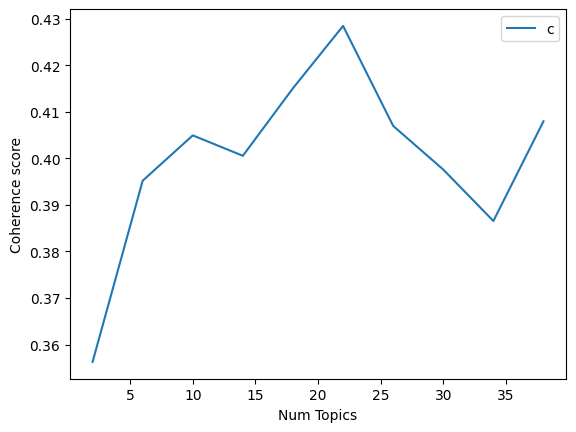

In [45]:
# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
data = df.copy()

In [ ]:
columns_to_remove = ['Date received', 'Company public response', 'State', 'ZIP code', 'Tags','Consumer consent provided?','Submitted via','Date sent to company','Company response to consumer','Timely response?','Consumer disputed?','Complaint ID']
data = data.drop(columns=columns_to_remove)

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

# Create a KModes instance
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

# Fit the model to your data
clusters = km.fit_predict(data)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7443, cost: 211374.0
Run 1, iteration: 2/100, moves: 702, cost: 211374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8103, cost: 216256.0
Run 2, iteration: 2/100, moves: 348, cost: 216256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1257, cost: 226452.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2826, cost: 239086.0
Run 4, iteration: 2/100, moves: 0, cost: 239086.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8820, cost: 221215.0
Run 5, iteration: 2/100, moves: 4, cost: 221215.0
Best run was number 1


In [ ]:
data['Cluster'] = clusters

In [ ]:
data['Cluster'].value_counts()

0    15695
4    12952
2    11238
1    10466
3    7102 
Name: Cluster, dtype: int64

In [ ]:
new_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data['Dominant_Topic']=new_df['Dominant_Topic']

In [ ]:
data = data.drop('Dominant_Topic1', axis=1)


In [ ]:
data

Product                     Sub-product  \
0      Vehicle loan or lease        Loan                             
1      Debt collection              Payday loan debt                 
2      Vehicle loan or lease        Loan                             
3      Checking or savings account  Savings account                  
4      Debt collection              Medical debt                     
...                ...                       ...                     
57448  Student loan                 Federal student loan servicing   
57449  Debt collection              Other debt                       
57450  Debt collection              Other debt                       
57451  Checking or savings account  Checking account                 
57452  Debt collection              Auto debt                        

                                                              Issue  \
0      Getting a loan or lease                                        
1      Attempts to collect debt not owed                              
2      Getting a loan or lease                                        
3      Managing an account                                            
4      Attempts to collect debt not owed                              
...                                  ...                              
57448  Dealing with your lender or servicer                           
57449  Attempts to collect debt not owed                              
57450  Communication tactics                                          
57451  Problem with a lender or other company charging your account   
57452  Took or threatened to take negative or legal action            

                                                  Sub-issue  \
0      Fraudulent loan                                        
1      Debt is not yours                                      
2      Credit denial                                          
3      Banking errors                                         
4      Debt is not yours                                      
...                  ...                                      
57448  Trouble with how payments are being handled            
57449  Debt was paid                                          
57450  Used obscene, profane, or other abusive language       
57451  Transaction was not authorized                         
57452  Threatened or suggested your credit would be damaged   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Consumer complaint narrative  \
0      This auto loan was opened on XX/XX/2020 in XXXX, NC with BB & T in my name. I have NEVER been to North Carolina and I have NEVER been a resident. I have filed a dispute twice through my credit bureaus but both times BB & T has claimed that this is an accurate loan. Which I wasn't aware of until today. I have tried to contact BB & T multiple times but I have never gotten through to a live person. I do n't drive and I have never owned a car befor

In [ ]:
unique_clusters = data['Cluster'].unique()

# Loop through unique clusters and count unique Dominant_Topics for each cluster
for cluster in unique_clusters:
    cluster_df = data[data['Cluster'] == cluster]
    unique_topics_in_cluster = cluster_df['Dominant_Topic'].nunique()
    print(f"Cluster {cluster}: Number of Unique Dominant Topics = {unique_topics_in_cluster}")


Cluster 0: Number of Unique Dominant Topics = 19
Cluster 2: Number of Unique Dominant Topics = 18
Cluster 3: Number of Unique Dominant Topics = 18
Cluster 1: Number of Unique Dominant Topics = 17
Cluster 4: Number of Unique Dominant Topics = 19


In [ ]:


# Find unique clusters in the DataFrame
unique_clusters = data['Cluster'].unique()

# Loop through unique clusters and count unique Dominant_Topics for each cluster
for cluster in unique_clusters:
    cluster_df = data[data['Cluster'] == cluster]
    unique_topics_in_cluster = cluster_df['Dominant_Topic'].nunique()
    unique_topics = cluster_df['Dominant_Topic'].unique()
    print(f"Cluster {cluster}: Number of Unique Dominant Topics = {unique_topics_in_cluster}, Dominant Topics = {', '.join(map(str, unique_topics))}")


Cluster 0: Number of Unique Dominant Topics = 19, Dominant Topics = 17, 3, 12, 14, 19, 1, 5, 4, 11, 20, 8, 7, 21, 2, 15, 10, 6, 9, 16
Cluster 2: Number of Unique Dominant Topics = 18, Dominant Topics = 17, 8, 12, 21, 11, 3, 4, 19, 20, 14, 9, 5, 16, 22, 10, 7, 13, 6
Cluster 3: Number of Unique Dominant Topics = 18, Dominant Topics = 17, 7, 3, 10, 21, 20, 12, 4, 16, 2, 11, 13, 19, 6, 14, 22, 8, 5
Cluster 1: Number of Unique Dominant Topics = 17, Dominant Topics = 3, 17, 19, 16, 12, 8, 11, 4, 21, 9, 20, 14, 1, 7, 5, 10, 6
Cluster 4: Number of Unique Dominant Topics = 19, Dominant Topics = 2, 3, 12, 20, 17, 6, 7, 14, 11, 10, 13, 21, 4, 19, 16, 8, 5, 22, 15


In [ ]:
d=data[data['Cluster']==1]

In [ ]:
d['Dominant_Topic'].unique()

array([3, 17, 19, 16, 12, 8, 11, 4, 21, 9, 20, 14, 1, 7, 5, 10, 6],
      dtype=object)

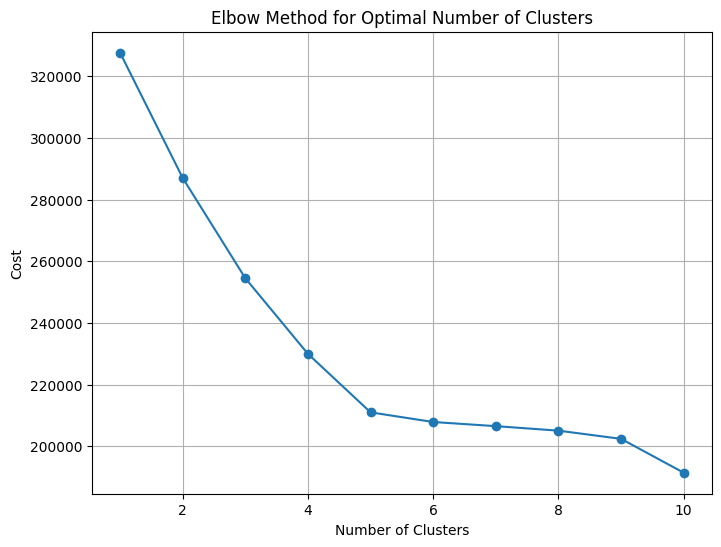

In [ ]:
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn import preprocessing

# Assuming you have already loaded and preprocessed your data
# You have a DataFrame named 'data'

# Define a range of cluster numbers to test
n_clusters_range = range(1, 11)  # Adjust the range as needed

# Initialize an empty list to store cost values
costs = []

# Perform KModes clustering for each value of n_clusters and record the cost
for n_clusters in n_clusters_range:
    km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0, random_state=42)  # You can adjust other parameters
    clusters = km.fit_predict(data)
    costs.append(km.cost_)

# Plot the cost values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, costs, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


# import library

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import word_tokenize
import re
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import gensim
from wordcloud import WordCloud
import wordcloud
#loading libraries
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [2]:
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Assuming you have a DataFrame called 'data' containing your data
# If not, you can load your data into a DataFrame
# data = pd.read_csv('your_data.csv')
